In [1]:
#Store these environment variables for later
la_vaca = 'moo'
ben = 'yees?'

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm


In [3]:
processed_df = pd.read_pickle('./processed_df.pkl')

In [4]:
X = processed_df['string_tokens']
y = processed_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05, stratify = y)

In [5]:
vectorizer = TfidfVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [6]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)


KNeighborsClassifier()

In [7]:
y_preds_k = k_neighbors.predict(X_test_vect)

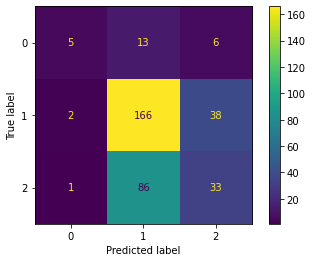

In [8]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [9]:
print(classification_report(y_preds_k, y_test))

              precision    recall  f1-score   support

           0       0.21      0.62      0.31         8
           1       0.81      0.63      0.70       265
           2       0.28      0.43      0.34        77

    accuracy                           0.58       350
   macro avg       0.43      0.56      0.45       350
weighted avg       0.68      0.58      0.61       350



In [10]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

y_preds_rfc = rfc.predict(X_test_vect)

In [11]:
print(classification_report(y_preds_rfc, y_test))

              precision    recall  f1-score   support

           0       0.21      0.71      0.32         7
           1       0.84      0.64      0.73       269
           2       0.35      0.57      0.43        74

    accuracy                           0.63       350
   macro avg       0.47      0.64      0.49       350
weighted avg       0.72      0.63      0.66       350



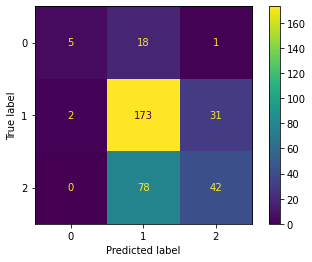

In [12]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

In [13]:
rfc_grid = {'n_estimators': np.arange(50, 100, 10),
    'max_depth': np.arange(3, 15, 4),
    'criterion': ['gini', 'entropy']
}

In [14]:
rfc_cv = GridSearchCV(estimator = rfc, param_grid = rfc_grid, cv = 5)

In [15]:
#rfc_cv.fit(X_train_vect, y_train)

In [16]:
#best_rfc = rfc_cv.best_estimator_

In [17]:
#rfc_cv.best_params_

In [18]:
#print(classification_report(best_rfc.predict(X_test_vect), y_test))

In [19]:
#plot_confusion_matrix(best_rfc, X_test_vect, y_test)

In [20]:
svcl = svm.SVC()
svcl.fit(X_train_vect, y_train)
svcl_score = svcl.score(X_test_vect, y_test)
print("Results for Support Vector Machine with TFIDF-Vectorizer")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vect)

Results for Support Vector Machine with TFIDF-Vectorizer
0.6485714285714286


In [21]:
print(classification_report(svcl.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         4
           1       0.90      0.64      0.75       287
           2       0.32      0.64      0.42        59

    accuracy                           0.65       350
   macro avg       0.46      0.76      0.49       350
weighted avg       0.79      0.65      0.69       350



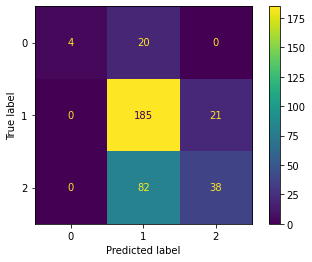

In [22]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [23]:
params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
clf_sv = GridSearchCV(svcl, params)
clf_sv.fit(X_train_vect, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'kernel': ('linear', 'rbf')})

In [24]:
best_sv = clf_sv.best_estimator_

In [25]:
print(classification_report(best_sv.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.25      0.60      0.35        10
           1       0.81      0.66      0.72       253
           2       0.41      0.56      0.47        87

    accuracy                           0.63       350
   macro avg       0.49      0.61      0.52       350
weighted avg       0.69      0.63      0.65       350



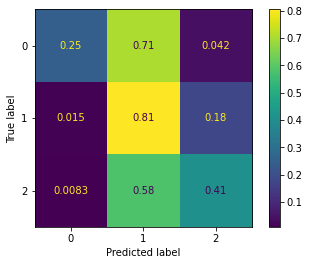

In [26]:
plot_confusion_matrix(best_sv, X_test_vect, y_test, normalize = 'true')

In [27]:
mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)

y_preds_mnb = mnb.predict(X_test_vect)


In [28]:
print(classification_report(mnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.04      1.00      0.08         1
           1       0.95      0.63      0.76       313
           2       0.20      0.67      0.31        36

    accuracy                           0.63       350
   macro avg       0.40      0.76      0.38       350
weighted avg       0.87      0.63      0.71       350



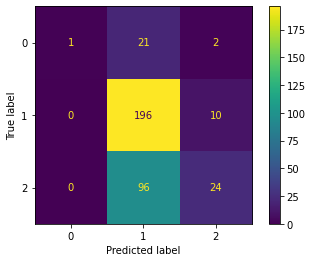

In [29]:
plot_confusion_matrix(mnb, X_test_vect, y_test)

In [30]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_mnb = cnb.predict(X_test_vect)

In [31]:
print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.42      0.28      0.33        36
           1       0.74      0.68      0.71       223
           2       0.42      0.56      0.48        91

    accuracy                           0.61       350
   macro avg       0.53      0.51      0.51       350
weighted avg       0.62      0.61      0.61       350



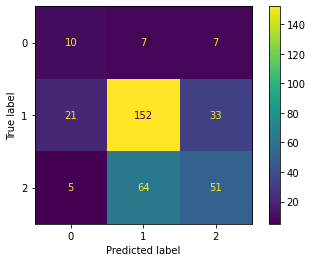

In [32]:
plot_confusion_matrix(cnb, X_test_vect, y_test)